## Workflow of hernan-lab-to-nwb package
The purpose of this package is to read various sources and types of data and to wrangle them to the NWB format, specifically after you have collected data and before you have processed data!!! (SEE PICTURE)

Additional changes to NWB would require specific user requirements. For example, if you were to segment your calcium imaging data into ROIs, you could add ROI masks to the NWB file, but this code won't do that. 

This should be run after collecting data!

Requirements:
1. Anaconda3
2. VScode or Spyder (code written in VScode, would recommend)

Installation:
1. conda create -n decode_lab_env python=3.9
2. conda activate decode_lab_env
3. git clone https://github.com/JohnStout/hernan-lab-to-nwb 
4. cd hernan-lab-to-nwb
5. pip install - e.

<img src="/Users/js0403/hernan-lab-to-nwb/tests/idealized workflow.png" />

----
# Neuralynx
Below can be changed as needed to create your nwb files

In [9]:
import numpy as np
import pandas as pd

In [1]:
# load packages
from hernan_lab_to_nwb.readers import ioreaders
from hernan_lab_to_nwb.utils import nwb_utils

# Define folder path
folder_path = r'X:\01.Experiments\R21\21-12\Sessions\DA testing\2021-11-22_11-48-20' # folder path

# Read data
ephys_object = ioreaders.read_nlx(folder_path) # we first instantiate the object
ephys_object.read_ephys() # read data

OS windows detected
Cite Neo https://github.com/NeuralEnsemble/python-neo/blob/master/CITATION.txt
Working with CSC
Working with TT


In [10]:
ephys_object.csc_grouping_table


,Name,TetrodeGroup,BrainRegion,Inclusion
0,HPC_black.ncs,1,[],True
1,HPC_blue.ncs,2,[],True
2,HPC_green.ncs,3,[],True
3,HPC_red.ncs,4,[],True
4,PFC_blue.ncs,5,[],True
5,PFC_red.ncs,6,[],True


In [18]:
for i in range(len(ephys_object.csc_grouping_table['TetrodeGroup'])):
    # fill out tetrode group
    ephys_object.csc_grouping_table['TetrodeGroup'][i] = i+1
    # fill out brainregion
    if 'HPC' in ephys_object.csc_grouping_table['Name'][i]:
        ephys_object.csc_grouping_table['BrainRegion'][i] = 'HPC'
    elif 'PFC' in ephys_object.csc_grouping_table['Name'][i]:
        ephys_object.csc_grouping_table['BrainRegion'][i] = 'PFC'

ephys_object.csc_grouping_table

C:\Users\uggriffin\AppData\Local\Temp\ipykernel_20180\1491044043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ephys_object.csc_grouping_table['TetrodeGroup'][i] = i+1
C:\Users\uggriffin\AppData\Local\Temp\ipykernel_20180\1491044043.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ephys_object.csc_grouping_table['BrainRegion'][i] = 'HPC'
C:\Users\uggriffin\AppData\Local\Temp\ipykernel_20180\1491044043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,Name,TetrodeGroup,BrainRegion,Inclusion
0,HPC_black.ncs,1,HPC,True
1,HPC_blue.ncs,2,HPC,True
2,HPC_green.ncs,3,HPC,True
3,HPC_red.ncs,4,HPC,True
4,PFC_blue.ncs,5,PFC,True
5,PFC_red.ncs,6,PFC,True


In [1]:
df = pd.DataFrame()
df['experiment_description']=['Trigger trials based on PFC-HPC coherence']
df['experimenter name(s)']=[['John Stout', 'Allison George', 'Suhyeong Kim', 'Henry Hallock', 'Amy Griffin']]
df['institution']=['University of Delaware']
df['lab_name']=['Griffin Lab']
df['subject_age']=['>PD90']
df['subject_description']=['Rat']
df['subject_species/genotype']=['Long Evans Rat']
df['recording_device_name']=['Digitalynx SX']
df['recording_device_description']=['Cheetah Software']
df['recording_device_manufacturer']=['Neuralynx']

NameError: name 'pd' is not defined

In [ ]:
df['session_description']=['Testing Session #1']
df['session_notes']=['NA']
df['session_id']=['Session1']
df['subject_id']=['21-12']
df['subject_sex']=['F']

In [ ]:

# Edit pandas array dynamically
_, ephys_object.csc_grouping_table = nwb_utils.pandas_excel_interactive(dir = ephys_object.folder_path, df = ephys_object.csc_grouping_table)
_, ephys_object.tt_grouping_table = nwb_utils.pandas_excel_interactive(dir = ephys_object.folder_path, df = ephys_object.tt_grouping_table)

# write file
ephys_object.write_nwb()

#### PROOF OF CONVERSION: Pynapple is lovely for loading the NWB file

nwbfile
┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys             │ Type        │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ units            │ TsGroup     │
│ epochs           │ IntervalSet │
│ ElectricalSeries │ TsdFrame    │
┕━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙
Unit data:
  Index    rate  quality    location
-------  ------  ---------  ----------
      0    5.85  good       PFC
      1    0.08  good       PFC
      2    2.02  good       PFC
      3    0.17  good       PFC
      4    0.7   good       PFC
      5    6.01  good       PFC
      6    8.05  good       PFC
      7    0.12  good       PFC
      8    0.35  good       PFC
      9    1.2   good       PFC
     10    0.07  good       PFC
     11    2.8   good       PFC
     12    0.14  good       PFC
     13    0.29  good       PFC
     14    0.72  good       PFC
     15    2.9   good       PFC
     16    0.06  good       PFC
     17    3.93  good       PFC
     18    0.76  good       PFC
     19    2.1   good       PFC
     20    1.53  goo

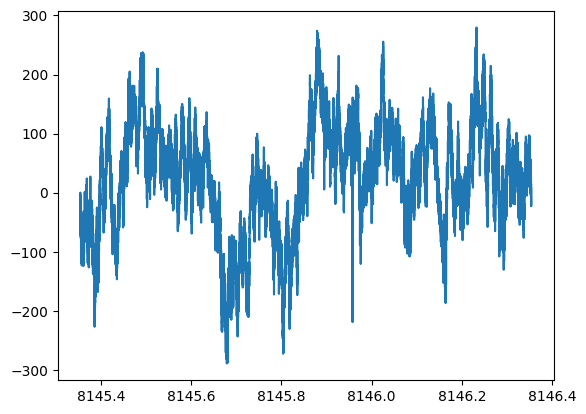

In [26]:
import pynapple as nap
import matplotlib.pyplot as plt

# load file and print output
data = nap.load_file(r'/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb')
print(data)

# print example of unit data
print("Unit data:")
print(data['units'])

# print example of LFP data
print("LFP data:")
print(data['ElectricalSeries'])

# plot signal
plt.plot(data['ElectricalSeries']['CSC1'][0:32000])